# Similarity & Clustering

## What is Clustering?

A cluster is a collection of data objects or a natural grouping of any sort.

*   Data objects are **similar** to one another within the same cluster
*   Data objects are **dissimilar** to the objects in other clusters

Clustering is a part of unsupervised learning and often part of EDA (exploratory data analysis) as an approach to analyze data sets to summarize their main characteristics.  This is more specifically known as **unsupervised segmentation** as they are creating segments without predefined targets.

**What are some applications of clustering?**

Clustering has two broad categories of application. It can be a **stand-alone tool** to get insight into underlying data by grouping related data together, or it can be a **data pre-processing step** before other algorithms are run.

A good clustering method produces high-quality clusters. A high-quality cluster would contain data objects showing high similarity within a cluster and low similarity across clusters. The quality of clusters depends on the metric at which we define similarity, how clustering was implemented, and the ability of the clusters to discover hidden patterns.

A simplified scientific approach to clustering would first require you to quantify object characteristics with numerical values. Next, calculate the distance between objects based on characteristics, utilizing a “similarity” metric that can be used to compare variables. 

| 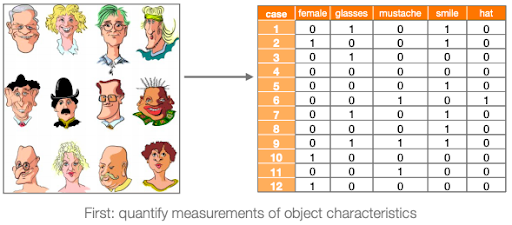|
|:--:|
|<b>Fig. 1 - Object Characteristics</b>|

**Euclidean distance** is a commonly used metric to measure distance between clusters. It can be calculated by utilizing the following equation: $$ d(x,y) = \sqrt \Sigma(x_{i} - y_{i})^{2} $$

Euclidean distance is a special case of **Minkowski Distance.**

Another case of Minkowski Distance is **Manhattan Distance.**

| 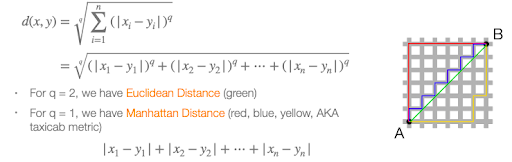|
|:--:|
|<b>Fig. 2</b>|

Assume that each side of the square is **one unit**. 

The distance between A and B is as follows:

(Assume A at origin, and B at (6,6))

**Euclidean Distance**: $$ \sqrt (6^{2} + 6^{2}) \approx 8.485 $$

**Manhattan Distance**: $$ | 0 - 6 | + | 0 - 6 | = 12 $$

## Rescaling Data

**Standardize**: subtract mean and divide by the standard deviation.

$$ x_{new} = \frac{x - \mu}{\sigma} $$

One way we can standardize data in Python is by using the StandardScaler() function.

After partitioning your data set into a train and test set as discussed in Chapter X, the StandardScaler () function can be utilized by:
```
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_X=scaler.fit_transform(train_X)
valid_X=scaler.transform(valid_X)
```

**Normalize**: scale to [0,1] by subtracting minimum and dividing by range

$$ x_{new} = \frac{x - x_{min}}{x_{max} - x_{min}} $$

We can normalize our data and use imputation for any missing values in Python by using the MinMaxScaler():
```
# Scale the data to be between 0 and 1 (default range)
mms = MinMaxScaler()
data_df_array = mms.fit_transform(data_df_sub) # results stored in a numpy array, not a dataframe. 

# IMPUTATION
# initialize imputer, which uses mean substitution 
# does this by taking the mean of the values of the two nearest neighbors
# n_neighbors: number of neighbors
# weights: whether and how to weight values; we don't weight
imputer = KNNImputer(n_neighbors=2, weights="uniform")

# apply the imputer function to the array
data_df_array=imputer.fit_transform(data_df_array) 

# convert the array back into a dataframe
data_df_norm = pd.DataFrame(data_df_array, columns=data_df_sub.columns)
```

What makes a good similarity metric?

*   Symmetry: d(x,y) = d(y,x)
*   Satisfy triangle inequality: d(x,y) &lt;= d(x,z) + d(z,y)
*   **Can** distinguish between different objects: if d(x,y) != 0 then x != y
*   **Can’t** distinguish between identical objects: if d(x,y) = 0 then x = y

## Clustering Algorithm

There are two popular algorithms for partitional clustering: k-means and k-medoids. Both aim to partition a dataset with n data objects into k clusters. This is accomplished by finding a partition of k clusters that optimizes the chosen partitioning criterion. The ideal solution to this would be finding the Global Optimum by exhaustively enumerating all partitions. For the purposes of this course, we will focus on k-means clustering. 

| 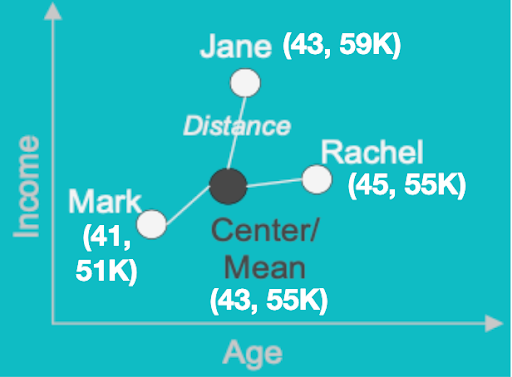|
|:--:|
|<b>Fig. 3 - Distances between data points and a pre-determined centroid.</b>|

In k-means clustering, we arbitrarily choose k initial cluster centroids and cluster data objects around them. Then, for the current partition, we compute new cluster centroids. Those new centroids are used to create new clusters and data objects are assigned to clusters based on the nearest new centroid. This process is repeated until there is no change to the centroids.

K-Means Clustering Steps:

1. **Randomly** cluster objects into k number of clusters around k number of centroids
2. For the current partition, compute new cluster centroids
    1. Centroids should be at the center (the mean value) of the cluster
3. Create new clusters, assigning each object to cluster with the nearest new centroid
4. Repeat steps 2 and 3 until there is no change to your centroids

| 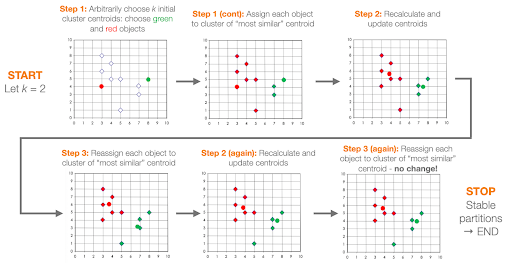|
|:--:|
|<b>Fig. 4 - K-Means Clustering Steps</b>|

How do we choose a value for k? 

We can create an elbow plot. An elbow plot showcases the distortion score for each k value. The graph will show an inflection point - an “elbow” point - at the most ideal k-value.

| 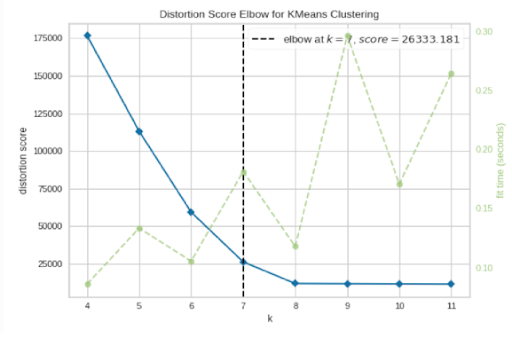|
|:--:|
|<b>Fig. 5 - Elbow Plot</b>|

Note that we calculate average distortion scores utilizing the normalized data. In this case, distortion is the sum of mean Euclidean distances between data points and the centroids of their assigned clusters.

Here is how we would go about creating an elbow plot for n = 15. This means we are looking at average distances for k = 1, 2, 3… 14, 15.

```
# from scipy.cluster.vq import kmeans, vq

# Declare variables for use
distortions = []
#How many clusters are you going to try? Specify the range 
num_clusters = range(1,16)

# Create a list of distortions from the kmeans function
for i in num_clusters:
    cluster_centers, distortion = kmeans(random_df_norm[['variable_of_interest_one', 'variable_of_interest_two']], i)
    distortions.append(distortion)

# Create a data frame with two lists - number of clusters and distortions
elbow_plot = pd.DataFrame({'num_clusters': num_clusters, 'distortions': distortions})

# Create a line plot of num_clusters and distortions
sns.lineplot(x='num_clusters', y='distortions', data=elbow_plot)
plt.xticks(num_clusters)
plt.show()
```

## Strengths + Weaknesses of k-means:

The k-means method is efficient and much faster than hierarchical clustering. It is also straightforward and intuitively implementable. 

Some weaknesses of the k-means method are that we need to specify the value of k before running the algorithm which directly affects the final outcome. Also, this method is very sensitive to outliers. K-medoids clustering can address this (where the centroid could be a data point itself). Lastly, the k-means method is not very helpful for categorical data and only applies when a mean and centroid values are defined.

## References:

## Glossary:

**Unsupervised Segmentation:**

**Data pre-processing:**

**Minkowski Distance:**

**Euclidean Distance:**

**Manhattan Distance:**

**Standardize:**

**Normalize:**

**Global Optimum:**

**K-Means Clustering:**

**Elbow Plot:**

**Hierarchical Clustering:**